# **GENDER CLASSIFICATION**

### **Introduction**

The **Gender Classification Dataset** is designed to build and evaluate machine learning models to predict gender based on various features. Through **Exploratory Data Analysis (EDA)**, we aim to understand the data structure, identify patterns, and prepare the dataset for model training and evaluation.



### **Objectives of EDA**
1. **Understanding Data Structure:**
   - Inspecting dataset size, structure, and column types.
   - Identifying numerical and categorical features.

2. **Handling Missing Values & Duplicates:**
   - Checking for null values and their proportion.
   - Identifying and removing duplicate entries if present.

3. **Data Distribution & Summary Statistics:**
   - Describing numerical features through statistical measures.
   - Analyzing the distribution of categorical features.

4. **Outlier Detection & Treatment:**
   - Identifying and handling outliers using statistical techniques (e.g., IQR method).

5. **Feature Correlation Analysis:**
   - Understanding relationships between numerical features.
   - Assessing feature importance for the target variable (`Gender`).

6. **Categorical Feature Encoding:**
   - Preparing categorical features for model training using techniques like **One-Hot Encoding** or **Label Encoding**.

7. **Feature Scaling:**
   - Standardizing or normalizing numerical features for better model performance.



### **Outcome of EDA:**
The EDA process will produce a **cleaned, transformed, and well-understood dataset**, ready for building accurate and robust machine learning models for gender classification.



### **Importing Libraries**

In [53]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Importing dataset**

In [54]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects/gender_classification_v7.csv')

### **Analysing top 10 data**

In [55]:
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


### **Checking information**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


### **Checking null values**

In [57]:
df.isna().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


### **Checking duplicate rows**

In [58]:
df.duplicated().sum()

1768

### **Dropping duplicate rows**

In [59]:
df.drop_duplicates(inplace=True)

### **Boxplot**

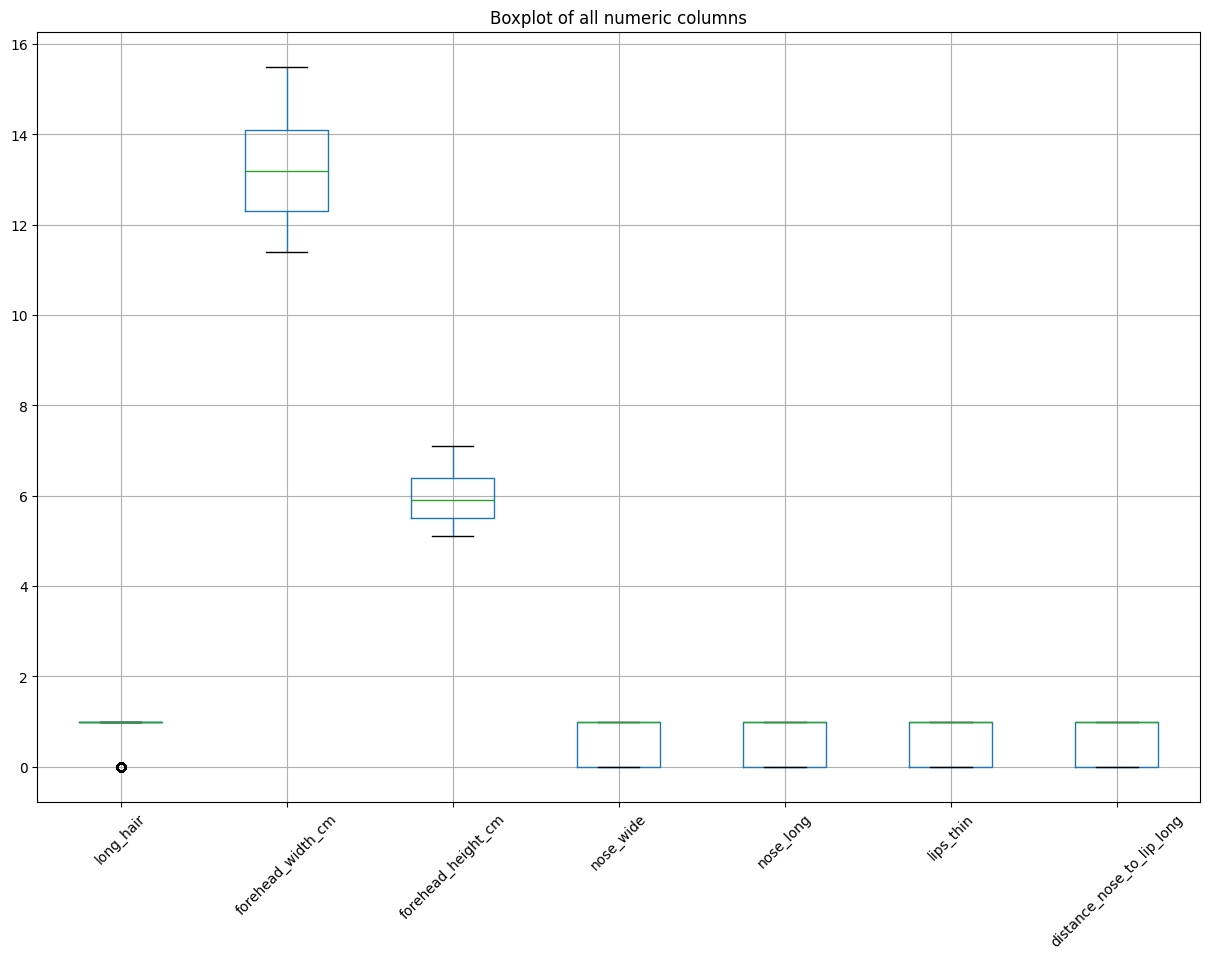

In [60]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
df[numeric_cols].boxplot()
plt.title('Boxplot of all numeric columns')
plt.xticks(rotation=45)
plt.show()

## **Statistical Analysis**

### Covariance

In [61]:
df[numeric_cols].cov()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,0.146067,-0.005609,-0.001081,0.004598,0.008079,0.007149,-0.002163
forehead_width_cm,-0.005609,1.245441,0.048879,0.118125,0.117541,0.122729,0.114845
forehead_height_cm,-0.001081,0.048879,0.302268,0.049502,0.041904,0.046605,0.050116
nose_wide,0.004598,0.118125,0.049502,0.248756,0.097764,0.094438,0.098213
nose_long,0.008079,0.117541,0.041904,0.097764,0.246749,0.095318,0.093378
lips_thin,0.007149,0.122729,0.046605,0.094438,0.095318,0.248594,0.094557
distance_nose_to_lip_long,-0.002163,0.114845,0.050116,0.098213,0.093378,0.094557,0.248023


### Correlation

In [62]:
df[numeric_cols].corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.013151,-0.005145,0.024123,0.042556,0.037514,-0.011362
forehead_width_cm,-0.013151,1.000000,0.079665,0.212223,0.212032,0.220566,0.206636
forehead_height_cm,-0.005145,0.079665,1.000000,0.180526,0.153438,0.170018,0.183036
nose_wide,0.024123,0.212223,0.180526,1.000000,0.394605,0.379767,0.395401
nose_long,0.042556,0.212032,0.153438,0.394605,1.000000,0.384860,0.377462
lips_thin,0.037514,0.220566,0.170018,0.379767,0.384860,1.000000,0.380805
distance_nose_to_lip_long,-0.011362,0.206636,0.183036,0.395401,0.377462,0.380805,1.000000


### Heatmap

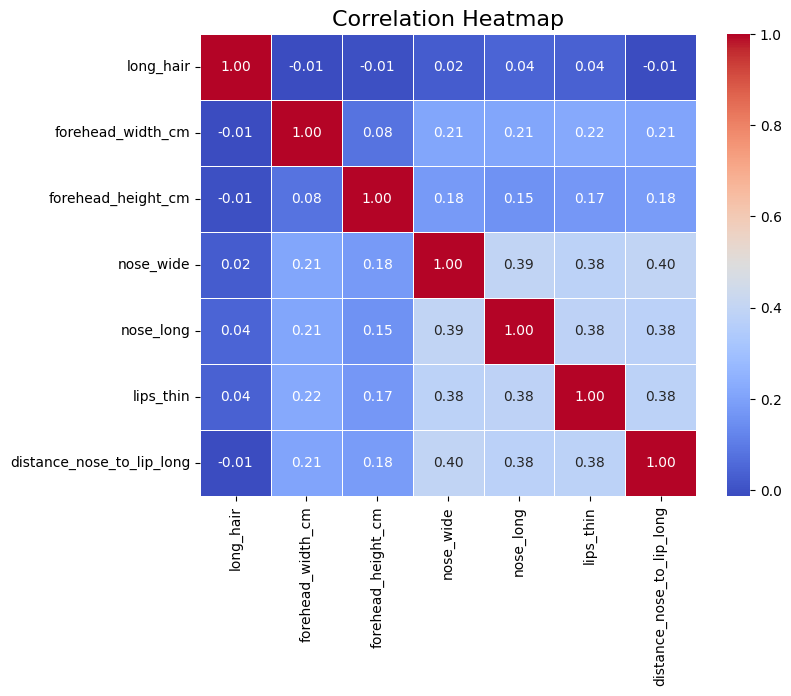

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Describe

In [64]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


### **Count Plot**

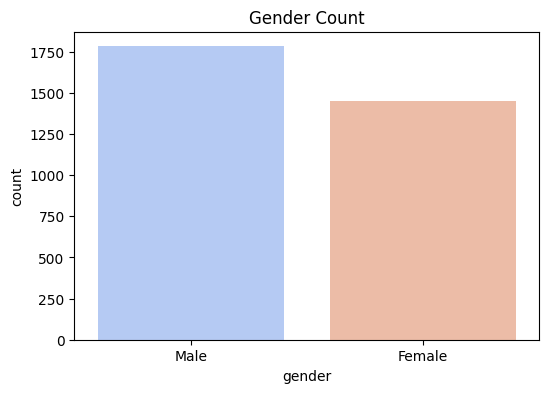

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Gender Count")
plt.show()

### **Histogram**

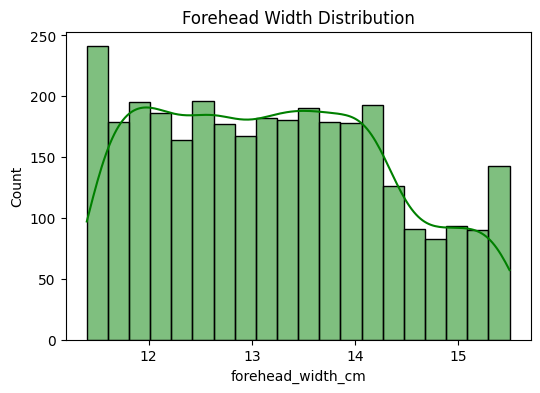

In [66]:
plt.figure(figsize=(6, 4))
sns.histplot(df["forehead_width_cm"], bins=20, kde=True, color="green")
plt.title("Forehead Width Distribution")
plt.show()

### **Pie Chart**

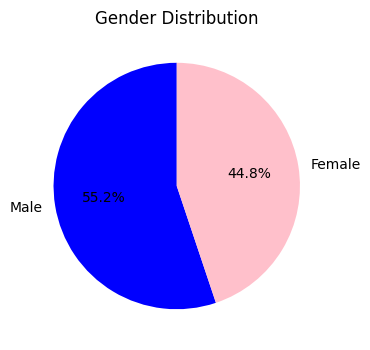

In [67]:
plt.figure(figsize=(6, 4))
gender_counts = df["gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "pink"], startangle=90)
plt.title("Gender Distribution")
plt.show()

### **Line Chart**

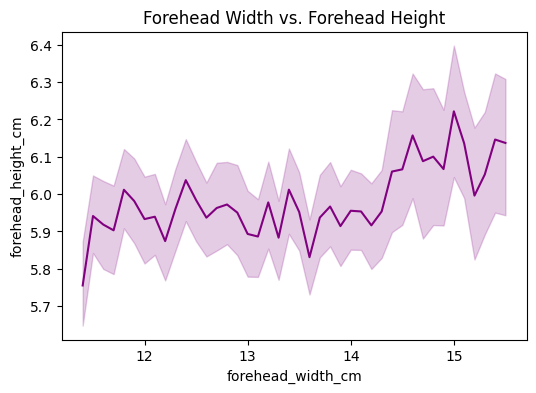

In [68]:
plt.figure(figsize=(6, 4))
sns.lineplot(x="forehead_width_cm", y="forehead_height_cm", data=df, color="purple")
plt.title("Forehead Width vs. Forehead Height")
plt.show()

### **Selecting x and y**

In [69]:
x = df.drop('gender', axis=1)

In [70]:
x.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [71]:
y = df['gender']

### **LabelEncoding y**

In [72]:
le = LabelEncoder()
y = le.fit_transform(y)

In [73]:
y_encoded = pd.DataFrame(y, columns = ['gender'])

In [74]:
y_encoded.head()

,gender
0,1
1,0
2,1
3,1
4,0


### **Scatterplot**

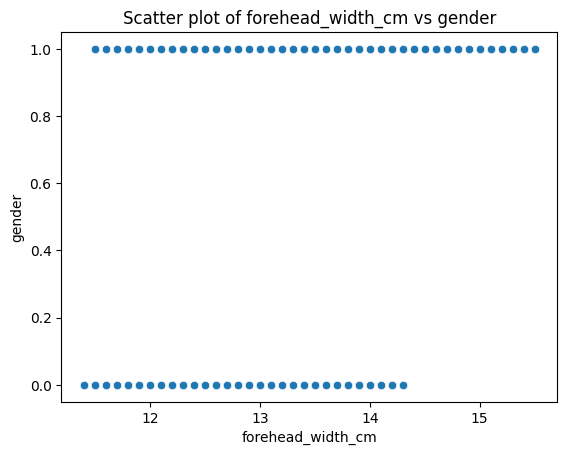

In [75]:
sns.scatterplot(df,x='forehead_width_cm', y=y)
plt.xlabel('forehead_width_cm')
plt.ylabel('gender')
plt.title(f'Scatter plot of forehead_width_cm vs gender')
plt.show()

### **Train Test Splitting**

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### **Classifying Gender using Logistic Regression**

In [77]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

### **Checking Accuracy**

Accuracy: 0.9598145285935085
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       308
           1       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



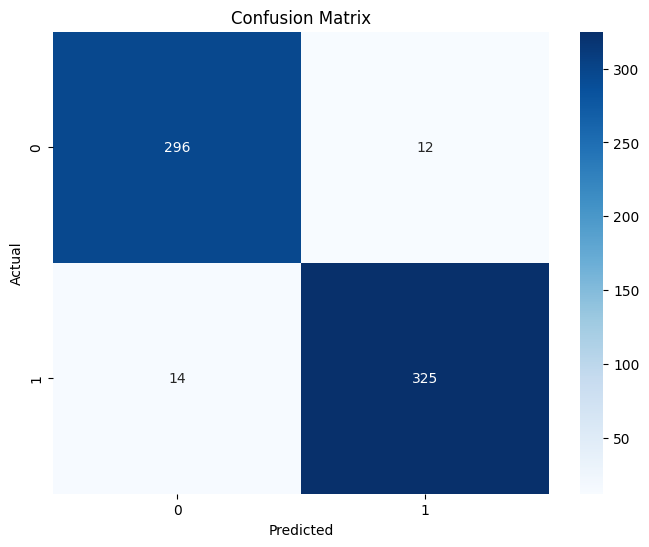

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Summary**

The EDA process aims to explore and prepare the **Gender Classification Dataset** for building a predictive model that accurately classifies gender based on various features.



###  **1. Data Understanding & Initial Analysis**
- **Loaded Dataset:** Successfully loaded using Pandas.
- **Data Inspection:** Displayed the first 10 rows and dataset information using `df.info()`.
- **Checking Missing Values:** No missing values were found (`df.isna().sum()`).
- **Checking Duplicate Rows:** Duplicate rows were found and successfully removed.


###  **2. Statistical & Graphical Analysis**
- **Statistical Measures:**
  - Covariance and Correlation matrices were generated to identify relationships between numerical features.
  - Summary statistics (`df.describe()`) were calculated.

- **Visualizations:**  
  - **Boxplots:** Visualized potential outliers in numerical columns.
  - **Heatmap:** Displayed correlations between numerical features.
  - **Count Plot:** Showed the distribution of genders in the dataset.
  - **Histogram:** Displayed the distribution of `forehead_width_cm`.
  - **Pie Chart:** Illustrated the proportion of genders.
  - **Line Chart:** Showed the relationship between `forehead_width_cm` and `forehead_height_cm`.
  - **Scatter Plot:** Visualized `forehead_width_cm` vs. `gender`.


###  **3. Data Preprocessing**
- **Feature Selection:**
  - `X`: All columns except the target variable (`gender`).
  - `y`: The target variable (`gender`).

- **Encoding Categorical Features:**
  - `LabelEncoder` was used to encode the `gender` column (converting labels to 0 and 1).

- **Train-Test Split:**
  - Data was split into training and testing sets with an 80:20 ratio.


###  **4. Model Building & Evaluation**
- **Model Used:** Logistic Regression.
- **Performance Metrics:**
  - Accuracy Score
  - Classification Report (Precision, Recall, F1-Score)
  - Confusion Matrix (Visualized using Seaborn Heatmap)
